In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from collections import Counter
from nltk.corpus import stopwords
import nltk
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer


In [2]:

# Load the dataset
df = pd.read_csv('./sentiment140-subset.csv')

# Display basic information
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Display column names
print(df.columns)

# Remove missing rows (if any)
df.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   polarity  500000 non-null  int64 
 1   text      500000 non-null  object
dtypes: int64(1), object(1)
memory usage: 7.6+ MB
None
polarity    0
text        0
dtype: int64
Index(['polarity', 'text'], dtype='object')


In [3]:
import re

def preprocess_tweet(tweet):
    # Remove handles (e.g., @username)
    tweet = re.sub(r'@\w+', '', tweet)
    # Convert to lowercase
    tweet = tweet.lower()
    # Remove non-alphabetic characters
    tweet = re.sub(r'[^a-z\s]', '', tweet)
    return tweet

#Apply preprocessing function to the tweet column
df['cleaned_tweet'] = df['text'].apply(preprocess_tweet)
print("\n" + "="*50)
print("After Preprocessing:")
print("="*50)
df


After Preprocessing:


,polarity,text,cleaned_tweet
0,0,@kconsidder You never tweet,you never tweet
1,0,Sick today coding from the couch.,sick today coding from the couch
2,1,"@ChargerJenn Thx for answering so quick,I was ...",thx for answering so quicki was afraid i was ...
3,1,Wii fit says I've lost 10 pounds since last ti...,wii fit says ive lost pounds since last time
4,0,@MrKinetik Not a thing!!! I don't really have...,not a thing i dont really have a life
...,...,...,...
499995,0,wants to go holiday also cannot..,wants to go holiday also cannot
499996,0,@LenaAlli i dont even know now lenaaa when yo...,i dont even know now lenaaa when you going c...
499997,1,At least I get to see the parts of Jenison I n...,at least i get to see the parts of jenison i n...
499998,1,haha i just visited my multiply account!,haha i just visited my multiply account


/var/folders/rj/z6q_byy96fb9fgx8q1fl8cw40000gn/T/ipykernel_47097/3080569518.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='polarity', data=df, palette='dark')


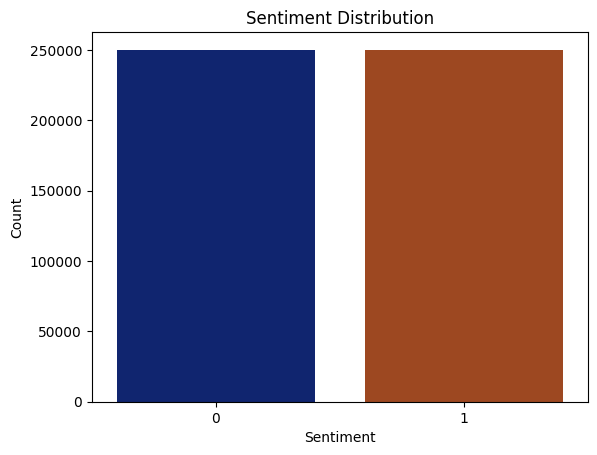

In [4]:
# Visualize the class distribution using Seaborn
sns.countplot(x='polarity', data=df, palette='dark')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [5]:
def preprocess_tweet(tweet):
    # Remove handles (e.g., @username)
    tweet = re.sub(r'@\w+', '', tweet)
    # Convert to lowercase
    tweet = tweet.lower()
    # Remove non-alphabetic characters
    tweet = re.sub(r'[^a-z\s]', '', tweet)
    return tweet

#Apply preprocessing function to the tweet column
df['cleaned_tweet'] = df['text'].apply(preprocess_tweet)
print("\n" + "="*50)
print("After Preprocessing:")
print("="*50)
df


After Preprocessing:


,polarity,text,cleaned_tweet
0,0,@kconsidder You never tweet,you never tweet
1,0,Sick today coding from the couch.,sick today coding from the couch
2,1,"@ChargerJenn Thx for answering so quick,I was ...",thx for answering so quicki was afraid i was ...
3,1,Wii fit says I've lost 10 pounds since last ti...,wii fit says ive lost pounds since last time
4,0,@MrKinetik Not a thing!!! I don't really have...,not a thing i dont really have a life
...,...,...,...
499995,0,wants to go holiday also cannot..,wants to go holiday also cannot
499996,0,@LenaAlli i dont even know now lenaaa when yo...,i dont even know now lenaaa when you going c...
499997,1,At least I get to see the parts of Jenison I n...,at least i get to see the parts of jenison i n...
499998,1,haha i just visited my multiply account!,haha i just visited my multiply account


[nltk_data] Downloading package stopwords to /Users/mc13/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/rj/z6q_byy96fb9fgx8q1fl8cw40000gn/T/ipykernel_47097/1932969489.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=common_words_df, palette='viridis')


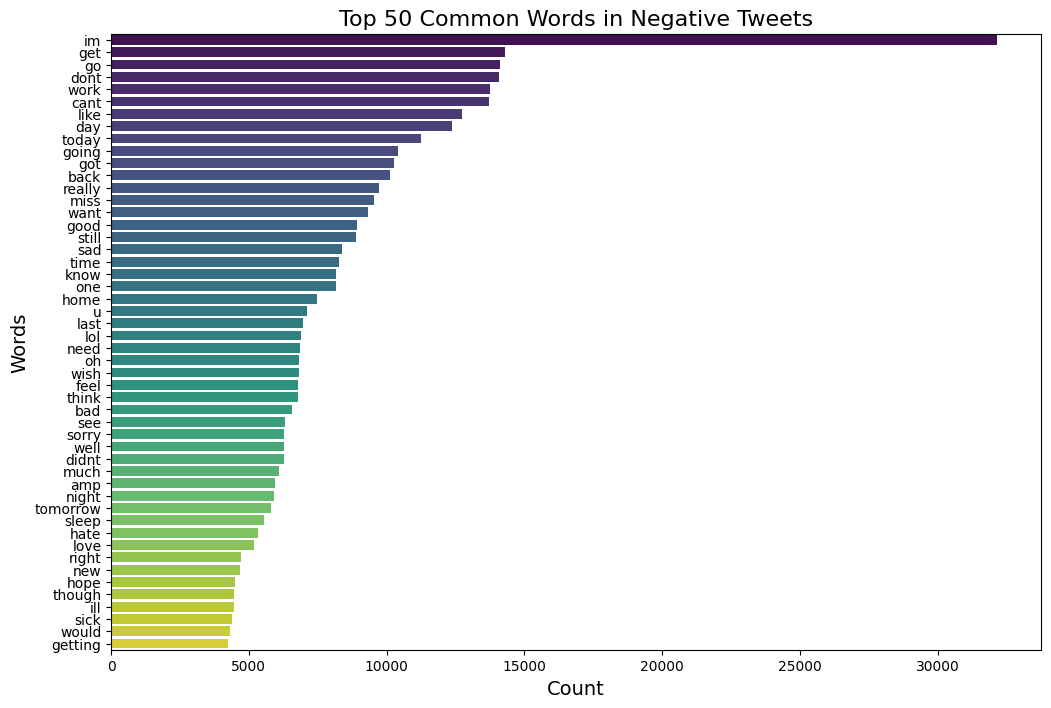

In [6]:
nltk.download('stopwords')
# Tokenize and clean the negative tweets (assuming 'polarity' == 0 represents negative tweets)
stop_words = set(stopwords.words('english'))
negative_tweets = df[df['polarity'] == 0]['cleaned_tweet']

all_words = []
for tweet in negative_tweets:
    words = re.findall(r'\b\w+\b', tweet.lower())  # Tokenize the tweet (only words)
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    all_words.extend(words)

# Count frequency of each word
common_words = Counter(all_words).most_common(50)

# Check if common_words is populated
if not common_words:
    print("No common words found in negative tweets!")
else:
    # Convert common words to a DataFrame for easier plotting with Seaborn
    words, counts = zip(*common_words)
    common_words_df = pd.DataFrame({'Word': words, 'Count': counts})

    # Create the Seaborn barplot
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Count', y='Word', data=common_words_df, palette='viridis')

    # Add titles and labels
    plt.title('Top 50 Common Words in Negative Tweets', fontsize=16)
    plt.xlabel('Count', fontsize=14)
    plt.ylabel('Words', fontsize=14)
    plt.show()

/var/folders/rj/z6q_byy96fb9fgx8q1fl8cw40000gn/T/ipykernel_47097/3987233154.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=common_words_df_positive, palette='magma')


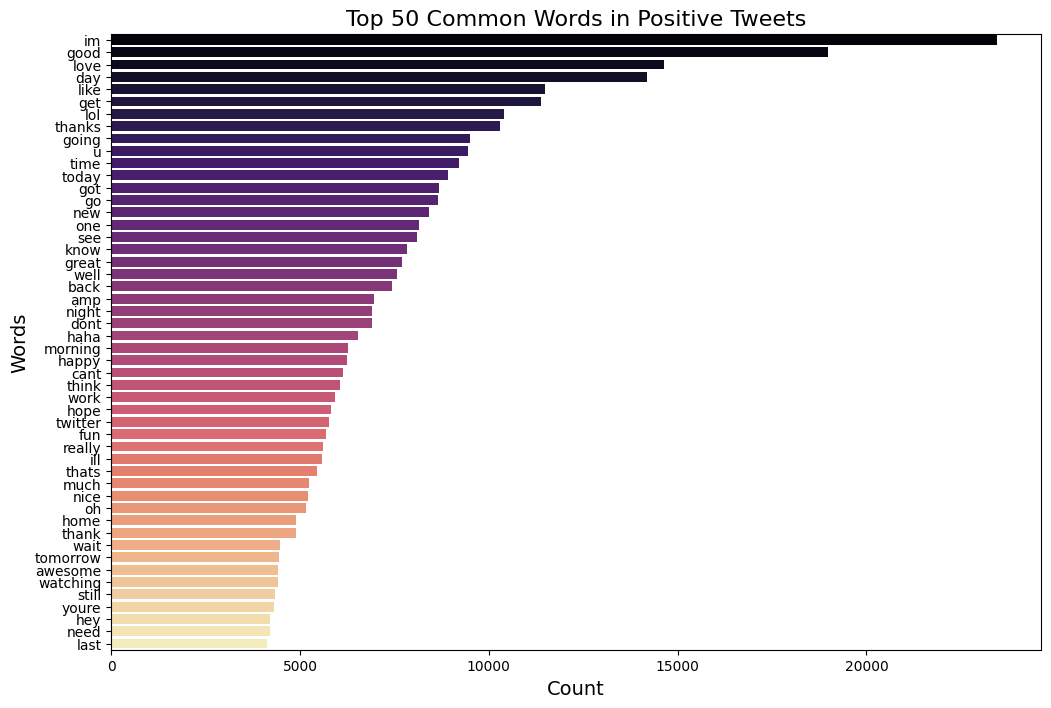

In [7]:
# Filter for positive tweets where 1 represents positive sentiment
positive_tweets = df[df['polarity'] == 1]['cleaned_tweet']

# Tokenize and clean the positive tweets
all_words_positive = []
for tweet in positive_tweets:
    words = re.findall(r'\b\w+\b', tweet.lower())  # Tokenize the tweet (only words)
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    all_words_positive.extend(words)

# Count frequency of each word in positive tweets
common_words_positive = Counter(all_words_positive).most_common(50)

# Check if common_words_positive is populated
if not common_words_positive:
    print("No common words found in positive tweets!")
else:
    # Convert common words to a DataFrame for easier plotting with Seaborn
    words_positive, counts_positive = zip(*common_words_positive)
    common_words_df_positive = pd.DataFrame({'Word': words_positive, 'Count': counts_positive})

    # Create the Seaborn barplot for positive tweets
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Count', y='Word', data=common_words_df_positive, palette='magma')

    # Add titles and labels
    plt.title('Top 50 Common Words in Positive Tweets', fontsize=16)
    plt.xlabel('Count', fontsize=14)
    plt.ylabel('Words', fontsize=14)
    plt.show()

In [8]:
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame with 'polarity' as the target and 'cleaned_tweet' as the feature
X = df['cleaned_tweet']  # Features (tweets)
y = df['polarity']       # Target (sentiment labels)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Training set size: 400000
Test set size: 100000


In [9]:
# Convert text data into numerical format using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [10]:
# Initialize the models
log_reg = LogisticRegression(max_iter=1000)
naive_bayes = MultinomialNB()
random_forest = RandomForestClassifier(n_estimators=100)

# Train the models
log_reg.fit(X_train_tfidf, y_train)
naive_bayes.fit(X_train_tfidf, y_train)
random_forest.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Predictions for each model
log_reg_preds = log_reg.predict(X_test_tfidf)
naive_bayes_preds = naive_bayes.predict(X_test_tfidf)
random_forest_preds = random_forest.predict(X_test_tfidf)

# Evaluate models using multiple metrics
def evaluate_model(model_preds, model_name):
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, model_preds):.4f}")
    print(f"Precision: {precision_score(y_test, model_preds):.4f}")
    print(f"Recall: {recall_score(y_test, model_preds):.4f}")
    print(f"F1-Score: {f1_score(y_test, model_preds):.4f}")
    print(classification_report(y_test, model_preds))
    print("-" * 50)

# Evaluate all models
evaluate_model(log_reg_preds, 'Logistic Regression')
evaluate_model(naive_bayes_preds, 'Naive Bayes')
evaluate_model(random_forest_preds, 'Random Forest')

Model: Logistic Regression
Accuracy: 0.7623
Precision: 0.7504
Recall: 0.7854
F1-Score: 0.7675
              precision    recall  f1-score   support

           0       0.78      0.74      0.76     50055
           1       0.75      0.79      0.77     49945

    accuracy                           0.76    100000
   macro avg       0.76      0.76      0.76    100000
weighted avg       0.76      0.76      0.76    100000

--------------------------------------------------
Model: Naive Bayes
Accuracy: 0.7494
Precision: 0.7536
Recall: 0.7404
F1-Score: 0.7469
              precision    recall  f1-score   support

           0       0.75      0.76      0.75     50055
           1       0.75      0.74      0.75     49945

    accuracy                           0.75    100000
   macro avg       0.75      0.75      0.75    100000
weighted avg       0.75      0.75      0.75    100000

--------------------------------------------------
Model: Random Forest
Accuracy: 0.7487
Precision: 0.7463
Recall: 

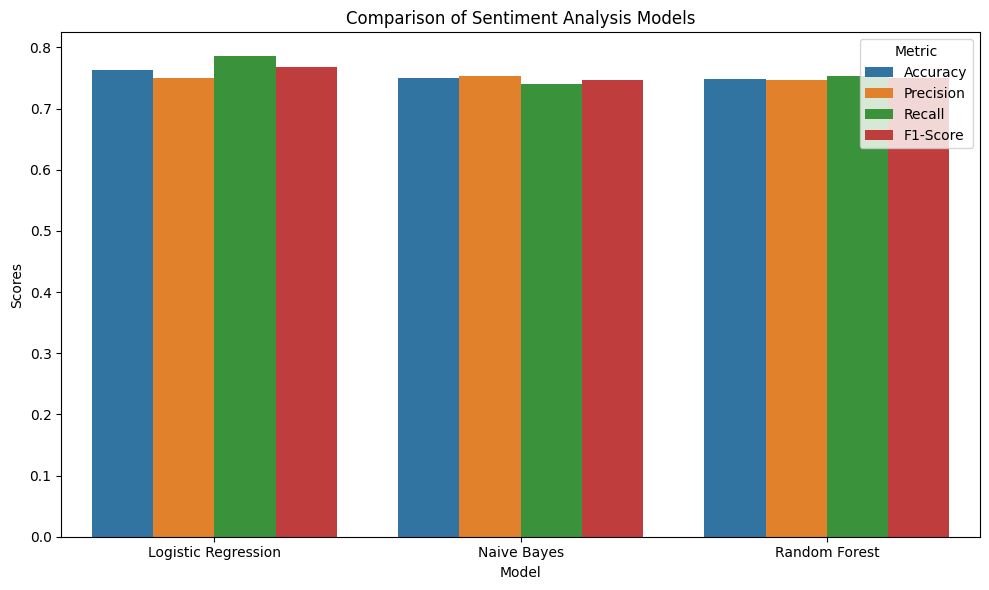

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Store the evaluation metrics for each model
models = ['Logistic Regression', 'Naive Bayes', 'Random Forest']
accuracy = [accuracy_score(y_test, log_reg_preds), accuracy_score(y_test, naive_bayes_preds), accuracy_score(y_test, random_forest_preds)]
precision = [precision_score(y_test, log_reg_preds), precision_score(y_test, naive_bayes_preds), precision_score(y_test, random_forest_preds)]
recall = [recall_score(y_test, log_reg_preds), recall_score(y_test, naive_bayes_preds), recall_score(y_test, random_forest_preds)]
f1_score = [f1_score(y_test, log_reg_preds), f1_score(y_test, naive_bayes_preds), f1_score(y_test, random_forest_preds)]

# Create a DataFrame to better handle the data
data = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1_score
})

# Melt the dataframe to have a long-form data structure
data_melted = data.melt(id_vars=['Model'], value_vars=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
                        var_name='Metric', value_name='Score')

# Create the seaborn barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=data_melted)

# Customize plot
plt.title('Comparison of Sentiment Analysis Models')
plt.ylabel('Scores')
plt.tight_layout()
plt.show()

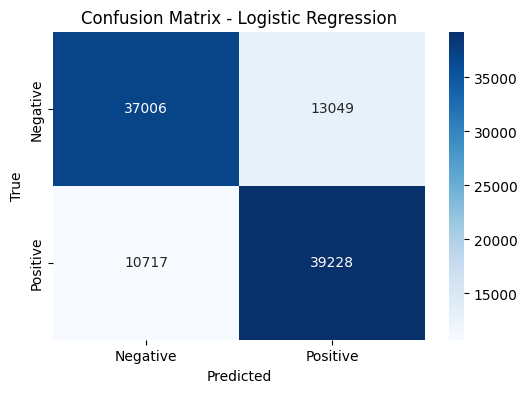

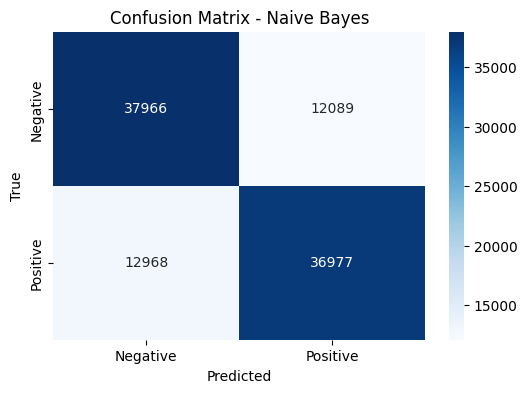

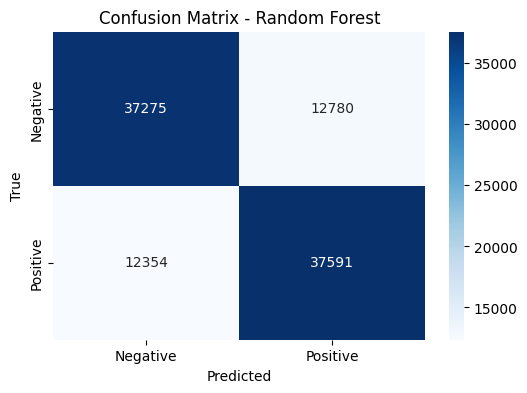

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot confusion matrices for all models
plot_confusion_matrix(y_test, log_reg_preds, 'Logistic Regression')
plot_confusion_matrix(y_test, naive_bayes_preds, 'Naive Bayes')
plot_confusion_matrix(y_test, random_forest_preds, 'Random Forest')

In [14]:
import joblib
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# Load dataset (Assuming df['cleaned_tweet'] contains text and df['polarity'] is the label)
X = df['cleaned_tweet']
y = df['polarity']

# Convert text into TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Naïve Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Train and save each model
for name, model in models.items():
    model.fit(X_tfidf, y)
    joblib.dump(model, f"{name.replace(' ', '_').lower()}_model.pkl")

# Save vectorizer
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

print("Models trained on full dataset and saved successfully!")

Models trained on full dataset and saved successfully!
